#### Feedback from previous two submissions was fairly positive, so I did not have much to adjust or correct. 

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [82]:
#importing csv file
df = pd.read_csv('AB_NYC_2019.csv')

# Quick Clean Up 
(taken from part 2 of project)

In [81]:
#changing type of room_type from object to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


#dropping rows with NaN values that cannot be resolved/replaced
df.dropna(subset = ['name', 'host_name', 'last_review', 'reviews_per_month'], inplace = True)


#renaming column for clearer meaning
df.rename(columns={'neighbourhood_group': 'borough'}, inplace = True)


#setting upper and lower limit
upper_limit = df['price'].quantile(0.75)
lower_limit = df['price'].quantile(0.25)


#creating new_df, filtered by values enclosed by upper and lower bounds
new_df = df[(df['price'] <= upper_limit) & (df['price'] >= lower_limit)]

new_df.drop(['id', 'name', 'host_name', 'borough','neighbourhood', 'room_type','last_review' ], axis= 1, inplace=True)

/var/folders/64/s710zfj15h92r248g2ky0ghr0000gn/T/ipykernel_92376/198498929.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['id', 'name', 'host_name', 'borough','neighbourhood', 'room_type','last_review' ], axis= 1, inplace=True)


# Additional Visualization

/var/folders/64/s710zfj15h92r248g2ky0ghr0000gn/T/ipykernel_92376/3847046731.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Text(0.5, 1.0, 'NYC Map by Yearly Aavailability')

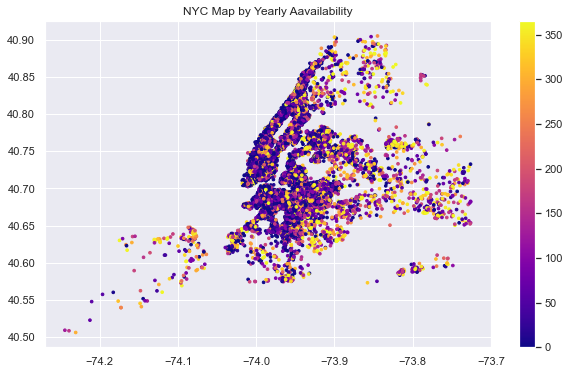

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(x = new_df.longitude,y = new_df.latitude, s=7, c=new_df.availability_365, cmap='plasma')
plt.colorbar()

plt.title("NYC Map by Yearly Aavailability")

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = new_df.drop(['price'], axis = 1)
y = new_df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size = .3)

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)

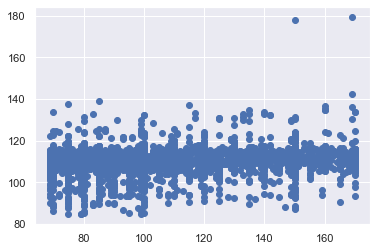

In [32]:
plt.scatter(y_test, y_pred_test)

In [37]:
#mean squared error on the test set
from sklearn.metrics import mean_squared_error
print('mean squared error on the test set:', mean_squared_error(y_test, y_pred_test))

mean squared error on the test set: 791.5897261843535


# Plotting the five worst predictions

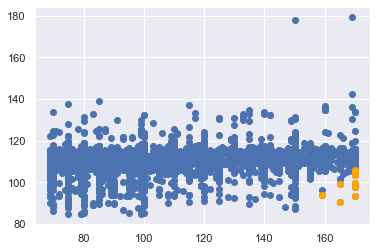

In [76]:
residuals = abs(y_pred_test - y_test)
worst10 = list(residuals.nlargest(10).index)
worsttestset = [y_test.index.get_loc(x) for x in worst10]

plt.scatter(y_test, y_pred_test)
plt.scatter(y_test[worst5],y_pred_test[worsttestset],color = 'orange')

In [79]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_value = regressor.score(X_test,y_test)
print(r2_value*100,'%')

3.655208701803969 %


#### Results were expected. To analyze performace, mean squared error was calculated. This yielded the number 791.5897261843535. This measures the mean squared diffence between the true values and the estimared values. I also ran the r2 value to determine the effectiveness of the regression model in revealing the data.